# Economic analysis
The aim of this notebook is to extract the quotes about economics from the dataset. Additionally, we import the Dow Jones stock price and compare it to our economics-related quotes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.dates as mdates
import json

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **1. Loading Data**



In [ ]:
PATH_ROOT = '/content/drive/MyDrive/EPFL/ADA'
PATH_TO_TOPICS = PATH_ROOT + '/topics_info.json'
PATH_TO_CLEAN = PATH_ROOT + '/Cleaned_data'
PATH_TO_QUOTES = PATH_TO_CLEAN + '/quote_topics_cleaned.parquet'

##1.1 Loading Quotebank dataset labellised with topic

In [ ]:
df = pd.read_parquet(PATH_TO_QUOTES)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222649 entries, 4 to 858366
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   quoteID         222649 non-null  object        
 1   quotation       222649 non-null  object        
 2   speaker         222649 non-null  object        
 3   qids            222649 non-null  object        
 4   date            222649 non-null  datetime64[ns]
 5   numOccurrences  222649 non-null  int64         
 6   topic           222649 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 13.6+ MB


## 1.2. Loading of topics dataset

In [ ]:
df_topics = pd.read_json(PATH_TO_TOPICS, orient='index')

In [ ]:
df_topics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7073 entries, 0 to 7072
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Topic   7073 non-null   int64 
 1   Count   7073 non-null   int64 
 2   Name    7073 non-null   object
dtypes: int64(2), object(1)
memory usage: 221.0+ KB


# **2. Relating quotes and real-life economics**

We extract economics-related quotes, using the topics dataset loaded in part 1.2

After that we compare them with the Dow Jones to see if we can find something interesting.

## 2.1 Extracting economics-related quotes

We choose words that are linked to economy to retrieve topics that are economics-related.

In [ ]:
eco_words = "economic|economy|economist|trade|finance|financial|banking|market|commerce|invest|money|fund|business|cash|taxation"

In [ ]:
eco_topics = df_topics[df_topics['Name'].str.contains(eco_words)]

In [ ]:
print('Retrieved {} topics.'.format(len(eco_topics)))

Retrieved 91 topics.


We have a look at all economics-related topics to make sure they all make sense and are indeed economics-related.

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
eco_topics

,Topic,Count,Name
9,8,1791,8_deduction_taxation_deductions_taxed
60,59,771,59_banking_bankers_banco_nonbanks
62,61,757,61_detective_detectives_investigations_investigators
119,118,503,118_stocks_investor_dow_stock
149,148,416,148_economists_economist_economics_economys
183,182,368,182_oversupplied_choppy_arcelormittal_endmarket
252,252,302,252_trademark_brands_trademarks_branding
284,283,282,283_entrepreneurs_entrepreneur_businessman_entrepreneurship
328,327,253,327_schmoney_schmucks_bounties_schmoopy
560,559,170,559_draft_drafted_drafts_traded


Typically, topic 61 : 'detective_detectives_investigations_investigators' is not about economics. Here is the list of the topics we chose to remove because they were not economics-related: 
-  61:  detective_detectives_investigations_investigators
- 327:  schmoney_schmucks_bounties_schmoopy
- 682:  epa_administrator_epas_superfund ([Superfund](https://en.wikipedia.org/wiki/Superfund))
- 2364: chlorinewashed_hormonetreated_globallyminded_marketers
- 3259: usfunded_secpompeo_healths_antiwomens 
- 3462: rival_investigate_suspicions_stonewalling
- 4111: prosensible_aleris_protrade_apprehension
- 4187: unfunded_semester_ivy_wolf
- 4227: flux_everythings_fundamentally_colleagues
- 5777: airpods_resuscitate_marathons_investigator
- 6000: moneyzero_slovenia_slovakia_germanys
- 6249: sheen_tradeoffs_infiltrate_congressmen
- 6472: topline_fundamentals_legally_
- 6919: schizophrenic_profundities_schizophrenics_ordeals

In [ ]:
eco_topics = eco_topics[~eco_topics['Topic'].isin([61, 327, 682, 2364, 3259, 3462, 4111, 4187, 4227, 5777, 6000, 6249, 6472, 6919])]

In [ ]:
print('Finally we have {} topics.'.format(len(eco_topics)))

Finally we have 77 topics.


Now we keep only the quotes for which the topic is related to economy:

In [ ]:
eco_quotes = df[df['topic'].isin(eco_topics['Topic'])]

In [ ]:
pd.reset_option('display.max_colwidth')
eco_quotes.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,topic
659,2020-02-11-016249,demeaning of the office he's seeking.,John H. Sununu,Q887489,2020-02-11 22:01:28,4,4415
770,2020-04-13-064800,will have to choose its best investments to su...,Kyle Stanford,Q6451456,2020-04-13 20:18:09,2,118
1270,2020-03-13-060025,the more quickly we can protect the economy.,Thomas R. Frieden,Q7815868,2020-03-13 10:30:06,2,148
1410,2020-04-10-023878,It can align with modern corporate values like...,Laura Montgomery,Q16215431,2020-04-10 07:00:10,1,1597
1603,2020-04-14-056793,There will need to be a conversation between e...,Carl-Johan Dalgaard,Q18646954,2020-04-14 17:19:43,3,148


## 2.2 Importing Dow Jones data from milestone 2

In [ ]:
# First we load the data in a DataFrame.

PATH_DOW_JONES = PATH_ROOT + '/USA30IDXUSD_D1.csv'

dj = pd.read_csv(PATH_DOW_JONES, sep='\t', parse_dates=['Time'])

In [ ]:
dj.head()

,Time,Open,High,Low,Close,Volume
0,2013-05-23,15343.0,15353.0,15155.0,15328.0,1374
1,2013-05-24,15328.0,15345.0,15311.0,15322.0,225
2,2013-05-26,15313.0,15359.0,15313.0,15331.0,117
3,2013-05-27,15331.0,15347.0,15281.0,15334.0,1005
4,2013-05-28,15334.0,15522.0,15332.0,15391.0,1372


The data comes from https://forexsb.com/historical-forex-data, and represents the value of the Dow Jones through time.

The columns `Open` and `Close` indicate the Dow Jones Index when the market respectively opened and closed on that day. The columns `High` and `Low` represent respectively the maximum and minimum values for the DJ index during that day.

In order to have meaningful data through time, we chose to always pick `Close` to be coherent, the choice between `Open` and `Close` is arbitrary.

In [ ]:
# We truncate the data to keep only data from 2015 and 2020, according to our quotes.

max_date = pd.to_datetime(eco_quotes['date'].max().date())

dj = dj[(dj['Time'] >= '2015-01-01') & (dj['Time'] <= max_date)]

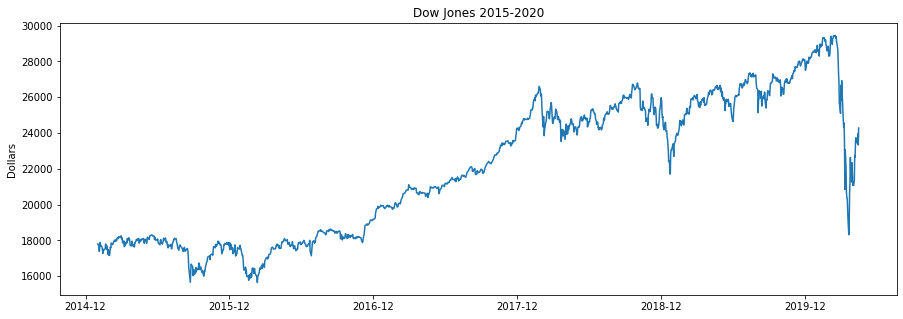

In [ ]:
# We plot the Dow Jones index in the specified timeframe.

plt.figure(figsize=(15, 5))

ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator(interval=365)

ax.xaxis.set_major_locator(locator)

plt.title('Dow Jones 2015-2020')
plt.ylabel('Dollars')
plt.plot(dj['Time'], dj['Close'])


In [ ]:
# We create a column Deriv1 showing the difference of the value from one day to the next, namely the first derivative of the Dow Jones.

dj['Deriv1'] = dj['Close'].diff()
dj['Deriv1_7d'] = dj['Deriv1'].rolling(7).sum()

In [ ]:
# plotly for datastory
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=dj['Time'], y=dj['Close'], name="Dow-Jones closing value"), row=1, col=1)
fig.add_trace(go.Scatter(x=dj['Time'], y=dj['Deriv1'], name="First derivative of Dow-Jones closing value"), row=2, col=1)

fig.update_layout(title_text="Dow Jones datas",
                  title_font_size=30)

fig.show()
fig.write_html(PATH_ROOT+"/html_fig/dowjones1.html", include_plotlyjs=False)

In [ ]:
# We take the rolling mean over the last 30 days to grasp significant changes over time
dj['rolling_mean'] = dj['Deriv1'].rolling(30).mean()

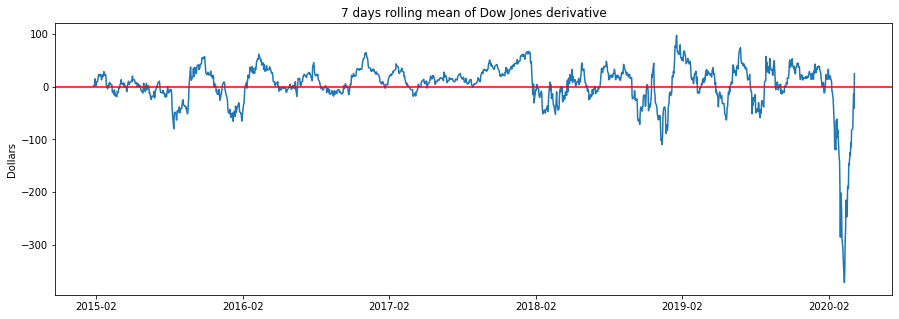

In [ ]:
plt.figure(figsize=(15, 5))

ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator(interval=365)

ax.xaxis.set_major_locator(locator)

plt.title('7 days rolling mean of Dow Jones derivative')
plt.ylabel('Dollars')
plt.plot(dj['Time'], dj['rolling_mean'])
plt.axhline(color='red')

We can see that between 2016 and 2018 the Dow Jones derivative is generally over 0, which means that the Dow Jones was mainly increasing during that period.

## 2.3 Comparing economics-related quotes and Dow Jones

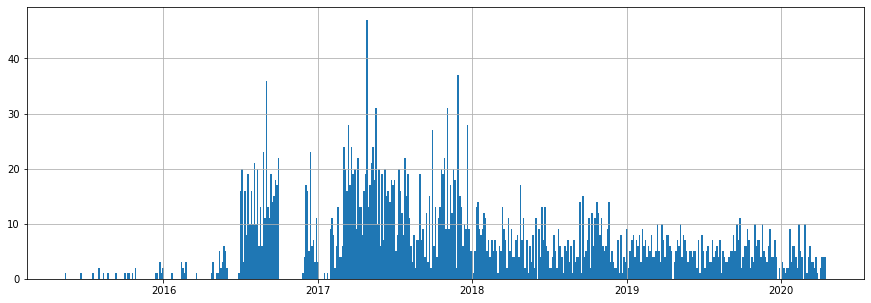

In [ ]:
# Quick glimpse of occurences of eco-related quotes
eco_quotes['date'].hist(bins=500, figsize=(15, 5))

In [ ]:
def quotes_vs_dj(dates=None):
  """
  Plots both economics-related quotes occurences and Dow Jones over time.
  
  Param:
  dates : interval of dates which we want to compare Dow Jones and our quotes.
          str or tuple of str, only the first and the last element of the tuple are used
  """

  if dates == None:
    dates = ['2015-01-01', '2020-04-16']

  elif isinstance(dates, list):
    if str(dates[-1]) == 'end':
      dates[-1] = '2020-04-16' 

  # Extract quotes and Dow Jones data during given years, default is 2015-2020
  eco_quotes_year = eco_quotes[(eco_quotes['date'] >= '{}'.format(dates[0])) & (eco_quotes['date'] <= '{}'.format(dates[-1]))]
  dj_dates = dj[(dj['Time'] >= '{}'.format(dates[0])) & (dj['Time'] <= '{}'.format(dates[-1]))]

  # plotly for datastory
  fig = make_subplots(rows=1, cols=1,specs=[[{"secondary_y": True}]])
  fig.add_trace(go.Histogram(x=eco_quotes_year['date'], opacity=0.65, name="Economic Citation Counts"), row=1, col=1, secondary_y=True)

  fig.add_trace(go.Scatter(x=dj_dates['Time'], y=dj_dates['Close'], name="Dow Jones"), row=1, col=1)

  fig.update_layout(title_text="Dow Jones vs Quotes from "+dates[0]+" to "+dates[1],
                  title_font_size=20)

  fig.show()
  fig.write_html(PATH_ROOT+"/html_fig/dowjones_vs_quotes_"+dates[0]+"-"+dates[1]+"_.html", include_plotlyjs=False)

In [ ]:
quotes_vs_dj()